In [1]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import utility as ut
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
import oneshot as sm
import eulerN as arch 
import torch
from torch import nn
# warnings.filterwarnings('ignore'


Uo1 = torch.tensor(np.load('../data/L63-trajectories/train1.npy'))
Uo2 = np.load('../data/L63-trajectories/train2.npy')
Uo3 = np.load('../data/L63-trajectories/train3.npy')
Uo4 = np.load('../data/L63-trajectories/train4.npy')
Uo5 = np.load('../data/L63-trajectories/train5.npy')
Uo6 = np.load('../data/L63-trajectories/train6.npy')
Uo7 = np.load('../data/L63-trajectories/train7.npy')
Uo8 = np.load('../data/L63-trajectories/train8.npy')
Uo9 = np.load('../data/L63-trajectories/train9.npy')
Uo10 = np.load('../data/L63-trajectories/train10.npy')

Vo = torch.tensor(np.load('../data/L63-trajectories/test.npy'))
L0, L1 = 0.4, 3.5
D, D_r, B = 3, 128, 1
beta = 7e-8
m = 500
data_folder = '../data'

In [4]:
drf = arch.DeepRF(2048, B, L0, L1, Uo1, beta, name='rf', save_folder=f'{data_folder}/EulerN/depth-{B}')
drf.learn(Uo1, 42)
drf.compute_tau_f(Vo[:500]);

Time taken by sample is 0.1577 seconds
Time taken by learn is 4.0871 seconds
Time taken by compute_tau_f is 2.9608 seconds


In [3]:
test = Vo[:100]
with torch.no_grad():
            test.to(drf.device)
            tau_f_se, tau_f_rmse = torch.zeros(len(test)).to(drf.device), torch.zeros(len(test)).to(drf.device)
            drf.validation_points = test.shape[-1]
            drf.error_threshold = 0.05
            drf.dt = 0.02
            drf.Lyapunov_time = 1/0.91
            se, rmse = torch.zeros(len(test)).to(drf.device), torch.zeros(len(test)).to(drf.device)
            forecast = drf.multistep_forecast 
          
          
            prediction = forecast(test[:,:,0], drf.validation_points)
            se_ = torch.sum((test - prediction)**2, axis=1) / torch.sum(test**2, axis=1)
            # mse_ = torch.cumsum(se_, dim=1) / torch.arange(1, se_.shape[1]+1).to(drf.device)
    
            
            l = torch.argmax((se_ > drf.error_threshold).to(torch.long), dim=1)
            l[l==0] = drf.validation_points
            l[l>0] -= 1
            tau_f_se = l * (drf.dt / drf.Lyapunov_time)


            # l = torch.argmax((se_ > drf.error_threshold).to(torch.long))
            # if l == 0:
            #     tau_f_se[validation_index] = drf.validation_points
            # else:
            #     tau_f_se[validation_index] = l-1
            
            # rmse[validation_index] = torch.sqrt(mse_[-1])
            # se[validation_index] = se_.mean()
    
                
            
            # tau_f_rmse *= 
            # tau_f_se *= (drf.dt / drf.Lyapunov_time)

(array([ 2.,  9., 16., 27., 26., 12.,  5.,  2.,  0.,  1.]),
 array([ 3.8766 ,  4.78842,  5.70024,  6.61206,  7.52388,  8.4357 ,
         9.34752, 10.25934, 11.17116, 12.08298, 12.9948 ]),
 <BarContainer object of 10 artists>)

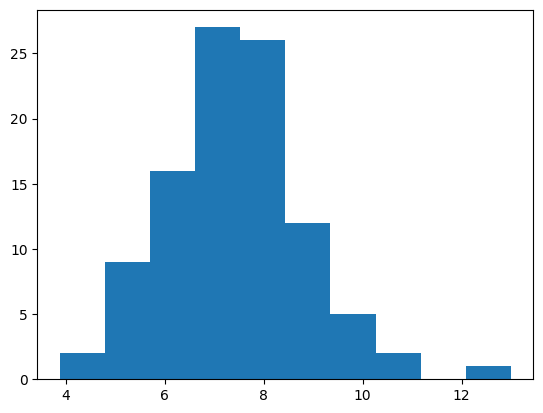

In [33]:
plt.hist(tau_f_se)

In [9]:
tau_f_se.mean()

tensor(0.0570)

In [2]:
description = "This experiment tests the class ExperimentLogger.This class is meant logging experiments easier."
el = ut.ExperimentLogger('../data', description)
el.add(rf1)

In [4]:
u = torch.randn(size=(100, 3, 1000))
v = torch.rand(size=(3,))

In [5]:
u/v[None, :, None]

tensor([[[-3.5993,  1.3222, -0.5173,  ...,  0.4573,  2.8793, -1.0779],
         [ 0.8935, -1.8705,  1.4385,  ...,  1.0063, -2.1321,  2.3312],
         [ 1.6556, -0.6227, -0.1012,  ...,  1.1691, -0.5597, -0.8853]],

        [[ 0.0500,  1.5609,  2.0837,  ...,  0.1753,  0.2229, -1.6152],
         [-0.0813,  0.3593, -1.0279,  ...,  1.1630,  1.7819,  0.0938],
         [-0.6427,  0.8120, -0.8345,  ...,  0.4540, -2.4000, -2.4228]],

        [[ 0.9281, -0.5818, -2.3651,  ..., -3.4366,  0.7950, -3.1214],
         [-1.3861,  0.6196,  1.8902,  ...,  0.1593,  1.6506,  1.0568],
         [-1.8919, -1.9876,  0.8293,  ...,  1.0532, -2.6866,  2.1978]],

        ...,

        [[ 0.9742, -0.1608, -0.3344,  ...,  0.1062,  1.8723,  2.3958],
         [ 1.8034, -0.3996,  0.0736,  ...,  1.0390, -1.8491,  0.5311],
         [-0.2268,  2.7024,  1.2423,  ...,  1.7986, -1.3464, -1.3865]],

        [[ 3.3774, -3.0372,  0.8355,  ..., -3.0964,  0.6117, -0.0855],
         [ 3.1302,  0.7854, -2.2922,  ..., -2.2116,  0.